In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

import numpy as np
MEPS = np.finfo(float).eps
import numpy.linalg as la

from scipy.optimize import minimize_scalar
from scipy.stats import linregress as linreg

In [48]:
def functional(eps, dist_mat, rbf , target_cond):
    return np.log( la.cond(rbf(dist_mat, eps)) / target_cond)**2

def optimize_eps(rbf, dist_mat, target_cond=10**12):
    n = dist_mat.shape[0]
    eps_guess = 1/np.min(dist_mat+np.diag([1]*n))
    optimization_result = minimize_scalar(functional, 
            bracket=[eps_guess/2, eps_guess*2],
            args=(dist_mat, rbf, target_cond))
    return optimization_result['x']

def rbf_interp(xs, fs, zs, rbf, shape=True, print_cond=False):
    dist_mat = np.abs(np.subtract.outer(xs,xs))
    if shape:
        eps = optimize_eps(rbf, dist_mat)
    else:
        eps = None
    A = rbf(dist_mat, eps)
    if print_cond:
        print('log Cond(A)= %g' % ( np.log(la.cond(A))/np.log(10) ) )
    cs = la.solve(A, fs)
    A = rbf(np.abs(np.subtract.outer(zs,xs)), eps)
    return A @ cs

The function found here is smooth but not analytic.
https://en.wikipedia.org/wiki/Non-analytic_smooth_function

In [71]:
def foo1(x):
    return np.less(0,x) * np.exp(-1/np.abs(x+MEPS))

def foo2(x):
    return np.sin(np.pi*2*x)

a,b = -1, 1


In [72]:
def gaussian(r, eps):
    return np.exp(-(eps*r)**2)

def phs(r, eps):
    return r**3

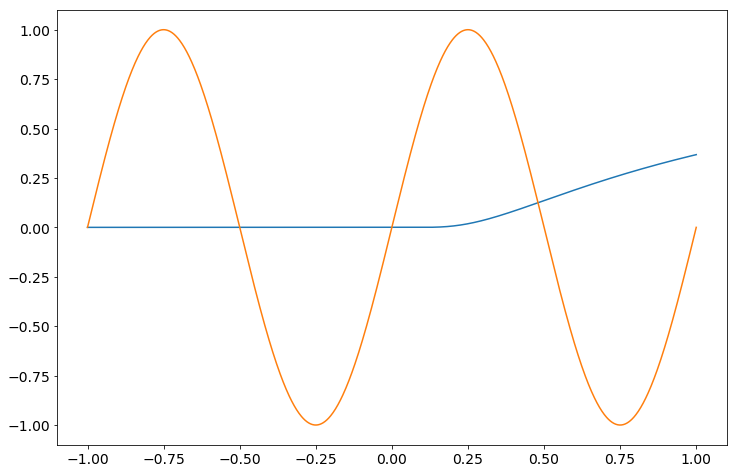

In [73]:
xs = np.linspace(a,b, 1000)
plt.figure(figsize=(12,8))
plt.plot(xs, foo(xs))
plt.plot(xs, foo2(xs))
plt.show()

log Cond(A)= 12
error: 3.05944e-05


[]

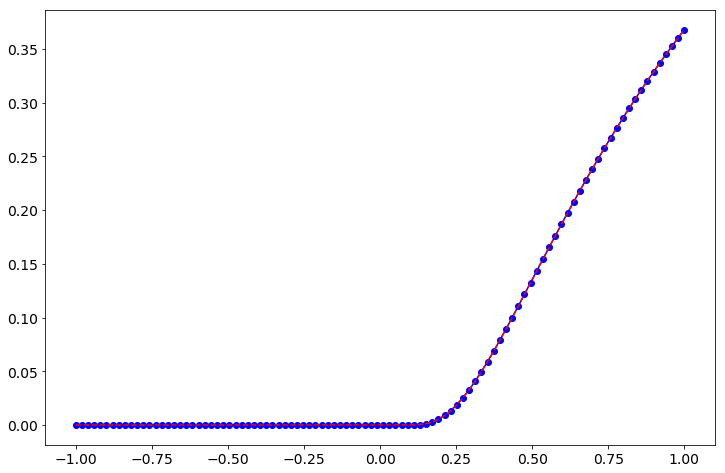

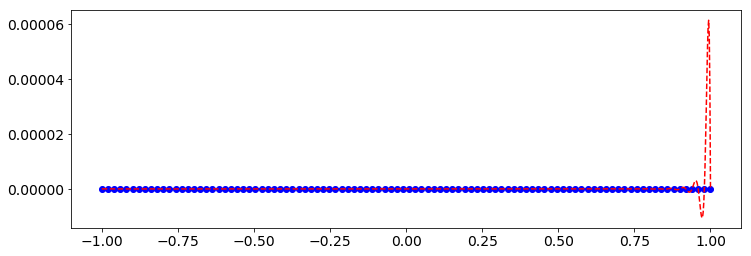

In [77]:
foo = foo1
n, m = 100, 1000

xs = np.linspace(a,b,n)
zs = np.linspace(a,b,m)
us = rbf_interp(xs, foo(xs), zs, rbf=gaussian, print_cond=True)

err = la.norm(us - foo(zs))/la.norm(foo(zs))
print('error: %g' % err)

plt.figure(figsize=(12,8))
plt.plot(zs, foo(zs), 'b-')
plt.plot(xs, foo(xs), 'bo')
plt.plot(zs, us, 'r--')
plt.plot()

plt.figure(figsize=(12,4))
plt.plot(zs, [0]*len(zs), 'b-')
plt.plot(xs, [0]*len(xs), 'bo')
plt.plot(zs, us-foo(zs), 'r--')
plt.plot()